In [1]:
import sys
sys.path.append("../src")
from Utils import *

In [2]:
%matplotlib inline

$$p(e_a|u_i)=\frac{\text{# posts by }u_i\text{ in } e_a}{\text{# posts by } u_i}$$

<br>

$$p(u_i|e_a)=\frac{\text{# posts by }u_i\text{ in } e_a}{\text{# posts in } e_a}$$

<br>

$$\textbf{MLE Similarity}=p(u_i|u_j) = 1-\prod_{\forall u_i, u_j \in users, \forall e \in elements} (1-
p(e|u_j)p(u_i|e))$$

<br>
<br>

$$E(u) = \text{# links by user }u$$
<br>
$$\textbf{Jaccard Similarity}=J(u_i|u_j) = \frac{E(u_i) \cap E(u_j)}{E(u_i) \cup E(u_j)}$$

In [3]:
max_size = 1e3
filename = "../data/RC_2013-02"
mle_similarities, jaccard_similarities, users_sentiments, users_subreddits = get_users_similarity(filename, max_size)

../src/Utils.py:145: UserWarning: Similarities are not normalized. Make sure to normalize MLE as 1-Sm, and Jaccard as Sj/Union
  warn("Similarities are not normalized. Make sure to normalize MLE as 1-Sm, and Jaccard as Sj/Union")


In [4]:
print("MLE-based Network")
mle_g = construct_mle_network(mle_similarities, 0.3, users_sentiments, users_subreddits)

MLE-based Network
160 nodes
126 edges


In [5]:
print("Jaccard-based Network")
jac_g = construct_jaccard_network(jaccard_similarities, 2, users_sentiments, users_subreddits)

Jaccard-based Network
284 nodes
997 edges


In [6]:
mle_G = get_biggest_component(mle_g, )

del mle_g

mle_G = augment_nodes(mle_G)
mle_G = augment_nodes(mle_G, weight='sim', community_detection=True)

There are 52 components
46 (28.75%) nodes		51 (40.48%) edges
3 (1.88%) nodes		3 (2.38%) edges
3 (1.88%) nodes		3 (2.38%) edges
3 (1.88%) nodes		3 (2.38%) edges
3 (1.88%) nodes		3 (2.38%) edges
Diameter: 2
Transitivity: 0.0179640718563
Modularity -0.000192233756248
Communities: 2


In [7]:
jac_G = get_biggest_component(jac_g)

del jac_g

jac_G = augment_nodes(jac_G)
jac_G = augment_nodes(jac_G, weight='sim')
jac_G = augment_nodes(jac_G, weight='w', community_detection=True)

There are 56 components
136 (47.89%) nodes		778 (78.03%) edges
13 (4.58%) nodes		78 (7.82%) edges
8 (2.82%) nodes		28 (2.81%) edges
8 (2.82%) nodes		28 (2.81%) edges
5 (1.76%) nodes		10 (1.0%) edges
Diameter: 2
Transitivity: 0.585311682543
Modularity 0.591734623747
Communities: 39


In [8]:
for n, data in mle_G.nodes(data=True):
    for k, v in data.items():
        print(k, v)
    break

('polarity', 0.0)
('clustering coeff', 0)
('sim_degree', 1)
('subs', "(u'AskReddit', 100.0)")
('degree', 1)
('gn_com', 1)
('closeness', 0.5056179775280899)
('sim_clustering coeff', 0)
('subreddit', u'AskReddit')
('sim_eigenvector', 0.10180097084476575)
('betweenness', 0.0)
('sim_betweenness', 0.0)
('subjectivity', 0.0)
('eigenvector', 0.10180097084476575)


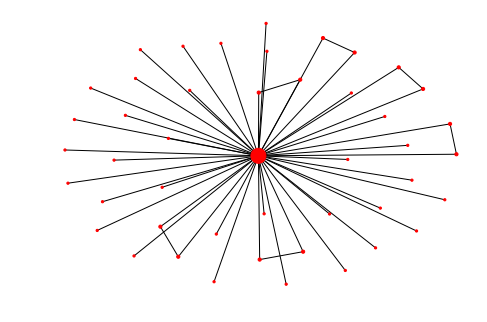

In [9]:
nx.draw(mle_G, node_size=[data["degree"]*5 for n, data in mle_G.nodes(data=True)])

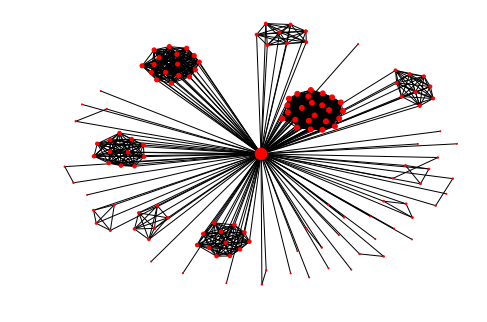

In [10]:
nx.draw(jac_G, node_size=[data["degree"] for n, data in jac_G.nodes(data=True)])